### Importing the Dependencies

In [30]:
#importing the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Get the Data and Data Preprocessing

In [31]:
#Get the dataset
dataset = pd.read_csv(r'./output/processed_data.csv')

In [50]:
dataset.columns

Index(['Date', 'Still Hospitalised', '7 days Moving Average',
       'Percentage Vaccinated', 'Phase_Phase 2 (Heightened Alert)',
       'Phase_Preparatory Stage', 'Phase_Stabilisation Phase'],
      dtype='object')

In [33]:
#Separating the independent and dependent features
#Dependent features
y = np.asarray(dataset['STI Price'].values.tolist()) 

# Independent Features
# Now, our dataset has only independent features
dataset.drop(["STI Price"], axis = 1, inplace = True)

In [34]:
# Get the processed Independent features 
X = np.asarray(dataset.values.tolist())

In [35]:
#Get the shapes of X and y
print("The shape of the independent fatures are ",X.shape)
print("The shape of the dependent fatures are ",y.shape)

The shape of the independent fatures are  (59, 7)
The shape of the dependent fatures are  (59,)


In [36]:
#Reshaping the Dependent features
y = y.reshape(len(y),1) # Changing the shape from (50,) to (50,1)

In [37]:
#Feature Scaling for Independent Variables
for i in range(X.shape[1]-2):
  X[:,i] = (X[:,i] - int(np.mean(X[:,i])))/np.std(X[:,i])


In [38]:
#Feature Scaling for Dependent Variables
y = (y - int(np.mean(y)))/np.std(y)

In [39]:
#Adding the feature X0 = 1, so we have the equation: y =  (W1 * X1) + (W0 * X0) 
X = np.concatenate((X,np.ones((X.shape[0],1))), axis = 1)

### Utility Methods

In [40]:
# The method "split_data" splits the given dataset into trainset and testset
# This is similar to the method "train_test_split" from "sklearn.model_selection"
def split_data(X,y,test_size=0.2,random_state=0):
    np.random.seed(random_state)                  #set the seed for reproducible results
    indices = np.random.permutation(len(X))       #shuffling the indices
    data_test_size = int(X.shape[0] * test_size)  #Get the test size

    #Separating the Independent and Dependent features into the Train and Test Set
    train_indices = indices[data_test_size:]
    test_indices = indices[:data_test_size]
    X_train = X[train_indices]
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]
    return X_train, y_train, X_test, y_test

In [41]:
class MultipleLinearRegression():

  def __init__(self):
    #No instance Variables required
    pass

  def forward(self,X,y,W):
    """
    Parameters:
    X (array) : Independent Features
    y (array) : Dependent Features/ Target Variable
    W (array) : Weights 

    Returns:
    loss (float) : Calculated Sqaured Error Loss for y and y_pred
    y_pred (array) : Predicted Target Variable
    """
    y_pred = sum(W * X)
    loss = ((y_pred-y)**2)/2    #Loss = Squared Error, we introduce 1/2 for ease in the calculation
    return loss, y_pred

  def updateWeights(self,X,y_pred,y_true,W,alpha,index):
    """
    Parameters:
    X (array) : Independent Features
    y_pred (array) : Predicted Target Variable
    y_true (array) : Dependent Features/ Target Variable
    W (array) : Weights
    alpha (float) : learning rate
    index (int) : Index to fetch the corresponding values of W, X and y 

    Returns:
    W (array) : Update Values of Weight
    """
    for i in range(X.shape[1]):
      #alpha = learning rate, rest of the RHS is derivative of loss function
      W[i] -= (alpha * (y_pred-y_true[index])*X[index][i]) 
    return W

  def train(self, X, y, epochs=10, alpha=0.001, random_state=0):
    """
    Parameters:
    X (array) : Independent Feature
    y (array) : Dependent Features/ Target Variable
    epochs (int) : Number of epochs for training, default value is 10
    alpha (float) : learning rate, default value is 0.001

    Returns:
    y_pred (array) : Predicted Target Variable
    loss (float) : Calculated Sqaured Error Loss for y and y_pred
    """

    num_rows = X.shape[0] #Number of Rows
    num_cols = X.shape[1] #Number of Columns 
    W = np.random.randn(1,num_cols) / np.sqrt(num_rows) #Weight Initialization

    #Calculating Loss and Updating Weights
    train_loss = []
    num_epochs = []
    train_indices = [i for i in range(X.shape[0])]
    for j in range(epochs):
      cost=0
      np.random.seed(random_state)
      np.random.shuffle(train_indices)
      for i in train_indices:
        loss, y_pred = self.forward(X[i],y[i],W[0])
        cost+=loss
        W[0] = self.updateWeights(X,y_pred,y,W[0],alpha,i)
      train_loss.append(cost)
      num_epochs.append(j)
    return W[0], train_loss, num_epochs

  def test(self, X_test, y_test, W_trained):
    """
    Parameters:
    X_test (array) : Independent Features from the Test Set
    y_test (array) : Dependent Features/ Target Variable from the Test Set
    W_trained (array) : Trained Weights
    test_indices (list) : Index to fetch the corresponding values of W_trained,
                          X_test and y_test 

    Returns:
    test_pred (list) : Predicted Target Variable
    test_loss (list) : Calculated Sqaured Error Loss for y and y_pred
    """
    test_pred = []
    test_loss = []
    test_indices = [i for i in range(X_test.shape[0])]
    for i in test_indices:
        loss, y_test_pred = self.forward(X_test[i], W_trained, y_test[i])
        test_pred.append(y_test_pred)
        test_loss.append(loss)
    return test_pred, test_loss
    

  def predict(self, W_trained, X_sample):
    prediction = sum(W_trained * X_sample)
    return prediction

  def plotLoss(self, loss, epochs):
    """
    Parameters:
    loss (list) : Calculated Sqaured Error Loss for y and y_pred
    epochs (list): Number of Epochs

    Returns: None
    Plots a graph of Loss vs Epochs
    """
    plt.plot(epochs, loss)
    plt.xlabel('Number of Epochs')
    plt.ylabel('Loss')
    plt.title('Plot Loss')
    plt.show()
  


### Performing Linear Regression

In [42]:
#Splitting the dataset
X_train, y_train, X_test, y_test = split_data(X,y)
regressor = MultipleLinearRegression()
#Training 
W_trained, train_loss, num_epochs = regressor.train(X_train, y_train, epochs=2000, alpha=0.0001)
#Testing on the Test Dataset
test_pred, test_loss = regressor.test(X_test, y_test, W_trained)

<ipython-input-41-6ac5a639f8f9>:19: RuntimeWarning: overflow encountered in square
  loss = ((y_pred-y)**2)/2    #Loss = Squared Error, we introduce 1/2 for ease in the calculation
<ipython-input-41-6ac5a639f8f9>:37: RuntimeWarning: overflow encountered in multiply
  W[i] -= (alpha * (y_pred-y_true[index])*X[index][i])
<ipython-input-41-6ac5a639f8f9>:37: RuntimeWarning: invalid value encountered in subtract
  W[i] -= (alpha * (y_pred-y_true[index])*X[index][i])
<ipython-input-41-6ac5a639f8f9>:37: RuntimeWarning: invalid value encountered in multiply
  W[i] -= (alpha * (y_pred-y_true[index])*X[index][i])


In [43]:
y_test

array([[3092.78],
       [3039.96],
       [3051.11],
       [3085.62],
       [3117.28],
       [3154.6 ],
       [3041.73],
       [3082.58],
       [3085.44],
       [3093.46],
       [3175.  ]])

In [44]:
test_pred

[2285355255.149821,
 2249882489.595859,
 2262472013.554382,
 2280421112.952082,
 2301952955.567597,
 2330078291.0650716,
 2250876998.9304852,
 2288274286.0311837,
 2286481909.4433923,
 2285100703.6350865,
 2345130450.744113]

In [45]:
def r2score(y_pred, y):
    """
    Parameters:
    y_pred: predicted values
    y: actual values
    
    Returns:
    r2: r2 score
    """
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)
    
    r2 = 1 - (rss / tss)
    return r2

In [46]:
r2score(test_pred,y_test)

-3.4194610825728364e+16

### Visualizing Results

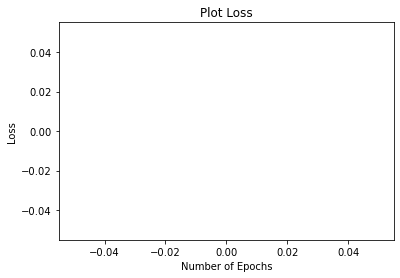

In [47]:
#Plot the Train Loss
regressor.plotLoss(train_loss, num_epochs)